import and load

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np


In [62]:

order_items_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/order_items.csv')
products_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/products.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/reviews.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/sellers.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/customers.csv')
geolocalizaciones_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/geolocalizaciones.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/orders.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/order_payments.csv')

# data preprocessing

In [63]:
def preprocess_and_analyze(df, df_name):
    print(f"\n\n--- Análisis de datos para {df_name} ---")

    # Primeras filas del DataFrame
    print(f"\nPrimeras filas:\n{df.head().to_string(index=False)}")

    # Tipos de datos
    print(f"\nTipos de datos:\n{df.dtypes}")

    # Verificación de valores nulos
    missing_values = df.isnull().sum()
    print(f"\nValores faltantes:\n{missing_values}")

    # Verificación de duplicados
    duplicates = df.duplicated().sum()
    print(f"\nDuplicados: {duplicates}")

    # Verificación de nombres de columnas correctos
    print(f"\nNombres de columnas: {df.columns.tolist()}")

    # Estadísticas básicas
    print(f"\nEstadísticas básicas:\n{df.describe(include='all')}")

    # Visualización de la distribución de valores en las columnas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    object_columns = df.select_dtypes(include=['object']).columns

    if len(numeric_columns) > 0:
        df[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(len(numeric_columns), 1), edgecolor='k', alpha=0.7)
        plt.suptitle(f'Distribución de valores en columnas numéricas ({df_name})')
        plt.show()

    for column in object_columns:
        if df[column].nunique() < 20:  # Si hay menos de 20 valores únicos, se muestra un gráfico de barras
            plt.figure(figsize=(10, 6))
            df[column].value_counts().plot(kind='bar')
            plt.title(f'Distribución de categorías en la columna {column} ({df_name})')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()

            counts = df[column].value_counts()
            small_categories = counts[counts < counts.max() * 0.05].index
            df[column] = df[column].replace(small_categories, 'Otros')
            plt.figure(figsize=(8, 8))
            df[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Diagrama circular para la columna {column} ({df_name})')



In [64]:
# Función para crear un boxplot individual
def create_boxplot(data, column, title):
    fig = go.Figure()
    fig.add_trace(go.Box(
        y=data[column],
        name=title,
        boxpoints='all',  # Mostrar todos los puntos
        jitter=0.3,       # Espaciado de puntos
        pointpos=-1.8     # Posición de puntos
    ))
    fig.update_layout(
        title=f'Boxplot para {title}',
        yaxis_title='Valor',
        xaxis_title=title,
        showlegend=False
    )
    fig.show()




# ORDER_ITEMS



--- Análisis de datos para order_items ---

Primeras filas:
                        order_id                       product_id                        seller_id shipping_limit_date  price  freight_value
e034f9f8187474a5b3658ff0c2f81a15 0b7b6d7fdf4b930642b1285cb1b27d74 b0ca3a35559f009cde9a73adaeb76923 2022-09-19 11:45:35  58.90          13.29
2d32bb698914d70984ac62c83f9f5a6d f1fc701f8d7ee1d1ea48ce94ff8f7e99 00100ca026c52cc489fd2ad39b56f90e 2022-05-03 13:05:13 239.90          19.93
ca80d8b7b4491087d834cb0f33c35f7a bb3b292dde43558566775aa9be8c319c 144c9aeab4325303fe0cd436e3478a8b 2023-01-18 15:48:30 199.00          17.87
f1411475545150c514c746338d34e4ac 2fa70f729b7b4197ba6b979ddb164945 67a193a464e9880e46c978bd67a78e0a 2023-08-15 12:10:18  12.99          12.79
a9eaf2aafbd838db3e9fa990f049ab6c 89e3cf1eca41576cbeaa653bb92a644d d4373b655a42dff0ed2c352535aa3729 2022-02-13 14:57:51 199.90          18.14

Tipos de datos:
order_id                object
product_id              object
seller_id    

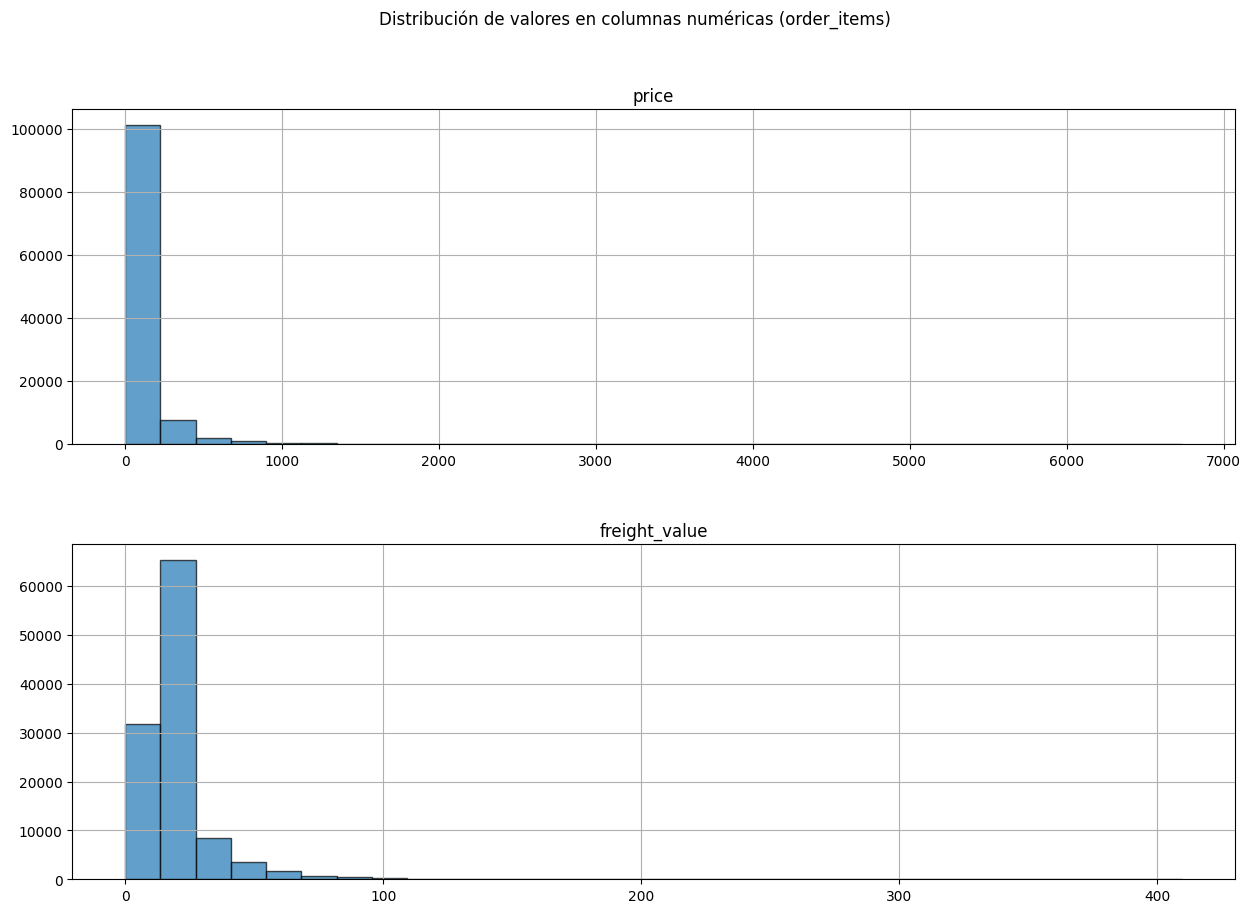

In [65]:
preprocess_and_analyze(order_items_df, 'order_items')

Change type of date.

In [66]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


order_items_df['shipping_date'] = order_items_df['shipping_limit_date'].dt.date
order_items_df['shipping_time'] = order_items_df['shipping_limit_date'].dt.time

order_items_df_cleaned = order_items_df.copy()

In [67]:
# Crear boxplot para el price
create_boxplot(order_items_df, 'price', 'price')

In [68]:
np.percentile(order_items_df['price'], [95, 99])

array([349.9, 890. ])

### Conclusion

Hay outliers enormes, eliminamos por el percentil 99


In [69]:
create_boxplot(order_items_df, 'shipping_limit_date', 'shipping_limit_date')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Conclusion

4 valores muy raros con la fecha shipping_limit_date para el año 2025

In [70]:
order_items_df_cleaned = order_items_df_cleaned[order_items_df_cleaned['shipping_limit_date'].dt.year <= 2024]

In [71]:
create_boxplot(order_items_df, 'freight_value', 'freight_value')

In [72]:
np.percentile(order_items_df['freight_value'], [95, 99])

array([45.12, 84.52])

### Conclusion

Podemos limpiar por el percentil 99.

Analys outliers en "price"

In [73]:
filtered_order_items_df = order_items_df[order_items_df['price'] > 5000]


print(filtered_order_items_df)

                                order_id                        product_id  \
3556    3fb6350f91507f601e62fa348ccb01dc  88ae7bb4eaf1763dcf6b36a89d1ef9af   
107841  dc2e1fe62c880d15164cce67851be4aa  9f36f7b6d7566e8c3c202d64d773bd87   
112233  70b2e45a74ab2b6f2f76f051a7cb33c4  16ed2fd98c5a8149f7565cf8bf34d64e   

                               seller_id shipping_limit_date   price  \
3556    2f16c18168e65021d7236303cb2374d3 2022-02-16 21:37:36  6735.0   
107841  7cfb1aa19473ae0f0a8114b416c23a52 2022-06-15 04:45:17  6499.0   
112233  ae4b86f18f1e829efa491f4d7a8ba9da 2023-08-02 06:05:13  6729.0   

        freight_value shipping_date shipping_time  
3556           194.31    2022-02-16      21:37:36  
107841         227.66    2022-06-15      04:45:17  
112233         193.21    2023-08-02      06:05:13  


In [74]:
product_ids = [
    '88ae7bb4eaf1763dcf6b36a89d1ef9af',
    '9f36f7b6d7566e8c3c202d64d773bd87',
    '16ed2fd98c5a8149f7565cf8bf34d64e'
]


filtered_products_df = products_df[products_df['product_id'].isin(product_ids)]


print(filtered_products_df)

                             product_id category_name  weight_g  length_cm  \
5899   88ae7bb4eaf1763dcf6b36a89d1ef9af    housewares   30000.0       60.0   
14423  9f36f7b6d7566e8c3c202d64d773bd87           art    7400.0       47.0   
21768  16ed2fd98c5a8149f7565cf8bf34d64e     computers    5660.0       54.0   

       height_cm  width_cm  
5899        61.0      33.0  
14423       25.0      25.0  
21768       18.0      47.0  


# **Conclucíon:**

datos sin nan. Hay outliers grandes en los columnas price, freight value y shipping limit date. Hay duplicados, pero este no es error, este es un pedido de un artículo en cantidades de varias piezas. Esta añadido 2 columnas: una para la fecha dd/mm/yyyy y en otra la hora hh/mm/ss para los graficos en Power BI.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# PRODUCTS




--- Análisis de datos para products ---

Primeras filas:
                      product_id  category_name  weight_g  length_cm  height_cm  width_cm
aa68716e61f409a9a1094f206119ddb8      perfumery     225.0       16.0       10.0      14.0
03ab5b3cf2c9a5ab6039a9bc1f089b05            art    1000.0       30.0       18.0      20.0
1e4a30072f1b19d96ce3da120be7cada sports_leisure     154.0       18.0        9.0      15.0
6e00272a496022fdf121e65445fe3060           baby     371.0       26.0        4.0      26.0
9ae40d5c6624e048b579fb187d05cba7     housewares     625.0       20.0       17.0      13.0

Tipos de datos:
product_id        object
category_name     object
weight_g         float64
length_cm        float64
height_cm        float64
width_cm         float64
dtype: object

Valores faltantes:
product_id         0
category_name    620
weight_g           2
length_cm          2
height_cm          2
width_cm           2
dtype: int64

Duplicados: 0

Nombres de columnas: ['product_id', 'category

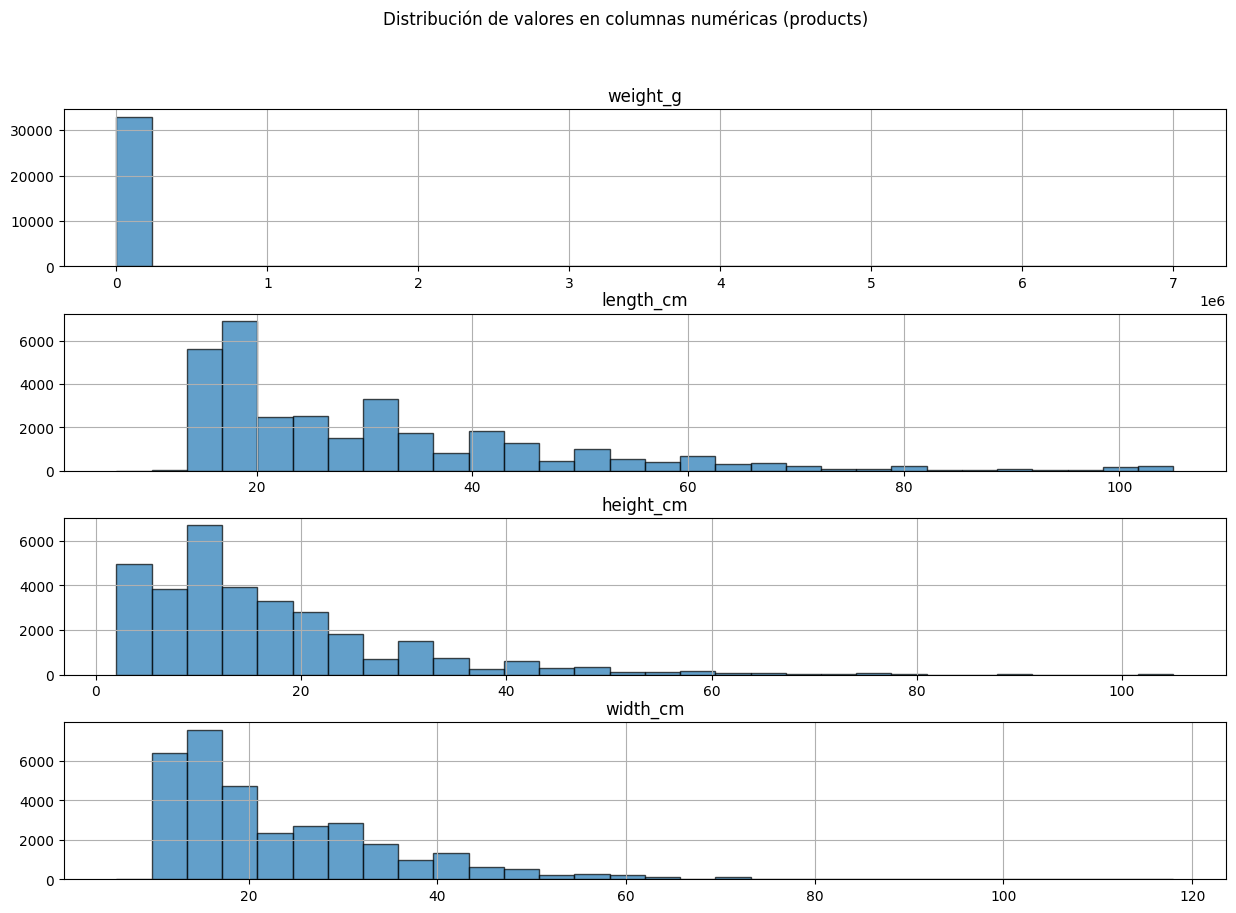

In [75]:
preprocess_and_analyze(products_df, 'products')

Conclusion: 620 missing category_name values, as well as 2 values ​​in 'weight_g', 'length_cm', 'height_cm', 'width_cm' - deleted

In [76]:

columns_to_check = ['category_name', 'weight_g', 'length_cm', 'height_cm', 'width_cm']
products_df_cleaned = products_df.dropna(subset=columns_to_check)




In [77]:
create_boxplot(products_df_cleaned, 'weight_g', 'Peso (g)')
create_boxplot(products_df_cleaned, 'length_cm', 'Longitud (cm)')
create_boxplot(products_df_cleaned, 'height_cm', 'Altura (cm)')
create_boxplot(products_df_cleaned, 'width_cm', 'Anchura (cm)')

# **Conclucíon:**

datos tienen 620 Nan en category_name y por 2 Nan en las columnas 'weight_g', 'length_cm', 'height_cm', 'width_cm' - eliminar

Eliminar el valor atípico en la columna weight_g de products_df.(7 000 000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# REVIEWS



--- Análisis de datos para reviews ---

Primeras filas:
                       review_id                         order_id score  has_comment review_creation_date review_answer_timestamp
6dfcfbbaab5833310f5fdd05dc83d906 0a5dd6592278318157d87679d109f330     4            0  2023-01-18 01:00:00     2023-01-18 22:46:59
9d449255ff8c66ecca9cdde6e908ea82 3fa1e7d63588d1a74b82affa9b003e1e     5            0  2023-03-10 01:00:00     2023-03-11 04:05:13
a7200f24b7d755f39c8465d3ce49962a cc9fa5ec8f08f922d1c7416d6b46018b     5            0  2023-02-17 01:00:00     2023-02-18 15:36:24
3adcf419637445b9a8a465732dd9edb6 719875e07cb5dff104ca3590bdcb9123     5            1  2022-04-21 02:00:00     2022-04-22 00:02:06
d4a80055586b443ec619012c6e30df7a 0da0db906205eb9d9d04e6111fa301cf     5            1  2023-03-01 01:00:00     2023-03-02 11:26:53

Tipos de datos:
review_id                  object
order_id                   object
score                      object
has_comment                 int64
review_cr

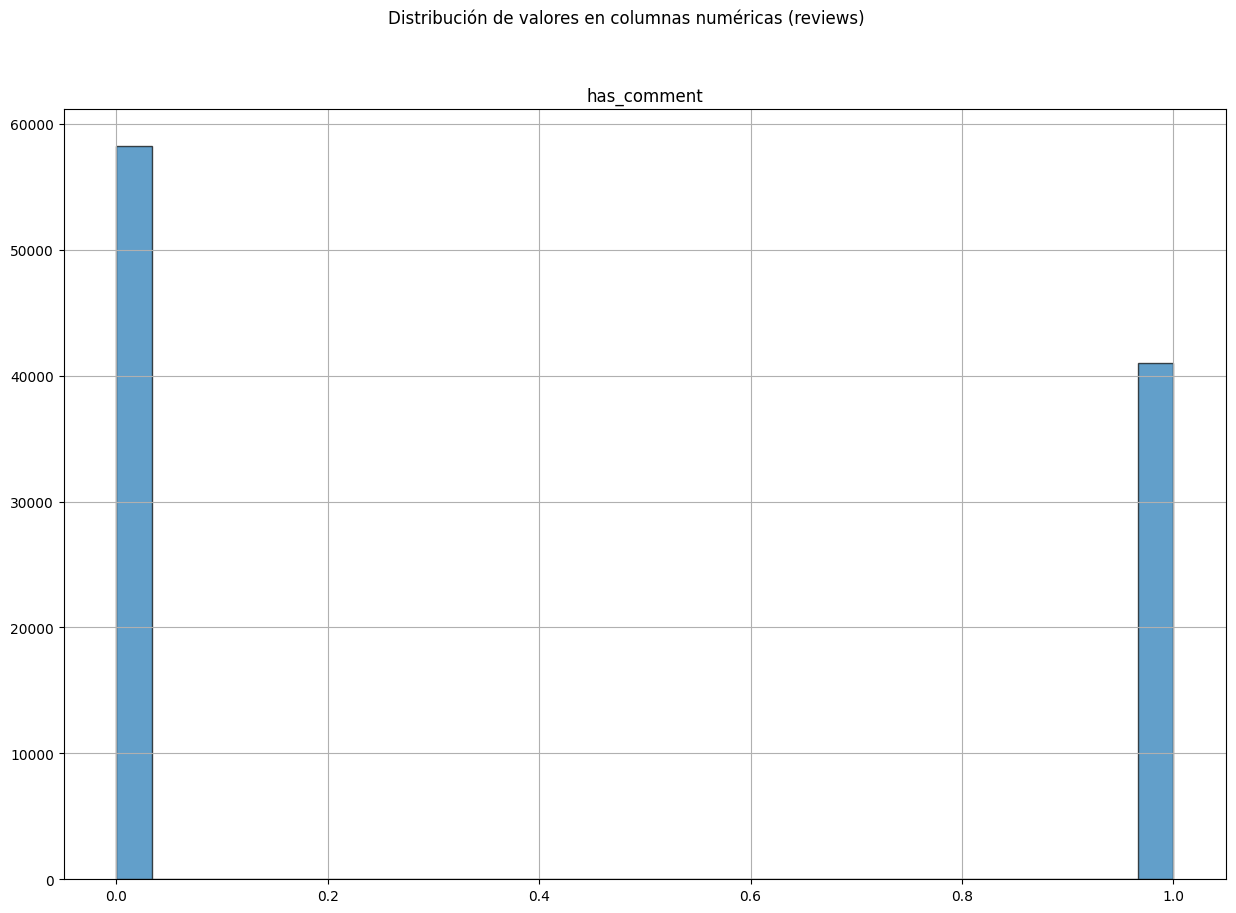

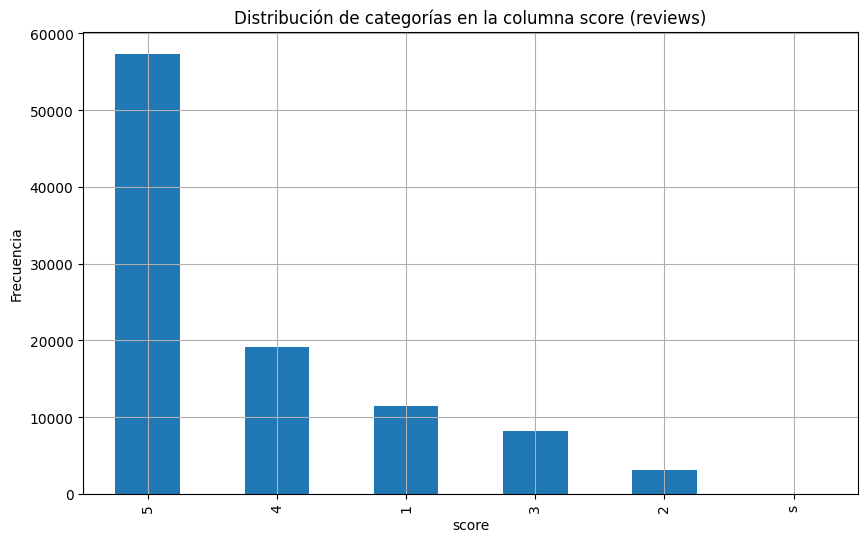

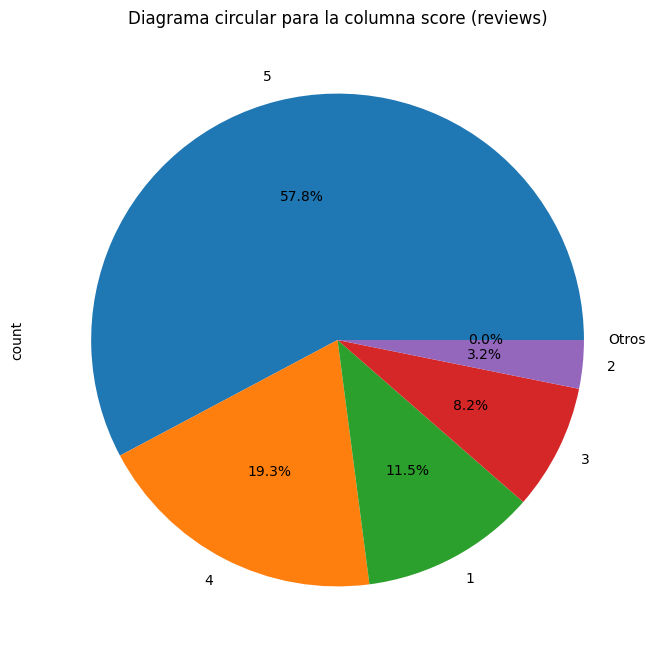

In [78]:
preprocess_and_analyze(reviews_df, 'reviews')

Removing 1 row with value s in the score column



In [79]:
score_counts = reviews_df['score'].value_counts()
score_counts

score
5        57327
4        19142
1        11424
3         8179
2         3151
Otros        1
Name: count, dtype: int64

In [80]:

reviews_df_cleaned = reviews_df[reviews_df['score'] != 's']



Analys fechas de review

In [81]:


# Paso 1: Convertir los tipos de datos
reviews_df_cleaned['review_creation_date'] = pd.to_datetime(reviews_df_cleaned['review_creation_date'])
reviews_df_cleaned['review_answer_timestamp'] = pd.to_datetime(reviews_df_cleaned['review_answer_timestamp'])

# Paso 2: Corregir las fechas de creación con año 1970
def corregir_fecha_creacion_anomalía(row):
    if row['review_creation_date'].year == 1970:
        return row['review_creation_date'].replace(year=row['review_answer_timestamp'].year)
    if row['review_creation_date'].year > pd.Timestamp.now().year:  # Corregir si el año es mayor al actual
        return row['review_creation_date'].replace(year=row['review_answer_timestamp'].year)
    return row['review_creation_date']

reviews_df_cleaned['review_creation_date'] = reviews_df_cleaned.apply(corregir_fecha_creacion_anomalía, axis=1)

# Paso 3: Corregir las fechas de respuesta con año 1900
def corregir_fecha_respuesta_anomalía(row):
    if row['review_answer_timestamp'].year == 1900:
        return row['review_answer_timestamp'].replace(year=row['review_creation_date'].year)
    if row['review_answer_timestamp'].year > pd.Timestamp.now().year:  # Corregir si el año es mayor al actual
        return row['review_answer_timestamp'].replace(year=row['review_creation_date'].year)
    return row['review_answer_timestamp']

reviews_df_cleaned['review_answer_timestamp'] = reviews_df_cleaned.apply(corregir_fecha_respuesta_anomalía, axis=1)

# Paso 4: Mostrar las fechas mínimas y máximas corregidas
min_review_creation_date = reviews_df_cleaned['review_creation_date'].min()
max_review_creation_date = reviews_df_cleaned['review_creation_date'].max()

min_review_answer_timestamp = reviews_df_cleaned['review_answer_timestamp'].min()
max_review_answer_timestamp = reviews_df_cleaned['review_answer_timestamp'].max()

print(f"Fecha mínima de creación de reseña: {min_review_creation_date}")
print(f"Fecha máxima de creación de reseña: {max_review_creation_date}")
print(f"Fecha mínima de respuesta a la reseña: {min_review_answer_timestamp}")
print(f"Fecha máxima de respuesta a la reseña: {max_review_answer_timestamp}")


Fecha mínima de creación de reseña: 2021-10-02 02:00:00
Fecha máxima de creación de reseña: 2023-08-31 02:00:00
Fecha mínima de respuesta a la reseña: 2021-10-07 20:32:28
Fecha máxima de respuesta a la reseña: 2023-10-29 13:27:35


# **Conclucíon:**

La columna score tiene un valor muy raro - 's', está eliminado.


Después de realizar las correcciones en las columnas de fechas, se resolvieron varias anomalías temporales:

    Años Anómalos Corregidos:
        Las fechas de creación de reseñas con el año 1970 fueron corregidas utilizando el año de la fecha de respuesta correspondiente.
        Las fechas de respuesta con el año 1900 fueron corregidas utilizando el año de la fecha de creación correspondiente.

    Validación de Fechas:
        Se verificaron y ajustaron fechas inusuales, como el año 2223, para asegurar la coherencia temporal en los datos.

Estas transformaciones garantizaron que todas las fechas en el conjunto de datos sean válidas y cronológicamente lógicas, eliminando errores que podrían afectar futuros análisis.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# SELLERS



--- Análisis de datos para sellers ---

Primeras filas:
                       seller_id  postal_code
1d4d325f6e9a8b3e2a34ba45c6fab13b      1248188
251058403151a0d80eb4fee3e2ee408c      1238658
851a7816c5034f490621cc8e2335b4c2      1240950
85fe9bc9e765ea6599ee57efb7375802      1245530
2ebd36cec0aa8bd78760114725fbdfa1      1248150

Tipos de datos:
seller_id      object
postal_code     int64
dtype: object

Valores faltantes:
seller_id      0
postal_code    0
dtype: int64

Duplicados: 0

Nombres de columnas: ['seller_id', 'postal_code']

Estadísticas básicas:
                               seller_id   postal_code
count                               3095  3.095000e+03
unique                              3095           NaN
top     1d4d325f6e9a8b3e2a34ba45c6fab13b           NaN
freq                                   1           NaN
mean                                 NaN  1.243930e+06
std                                  NaN  4.028435e+03
min                                  NaN  1.234581

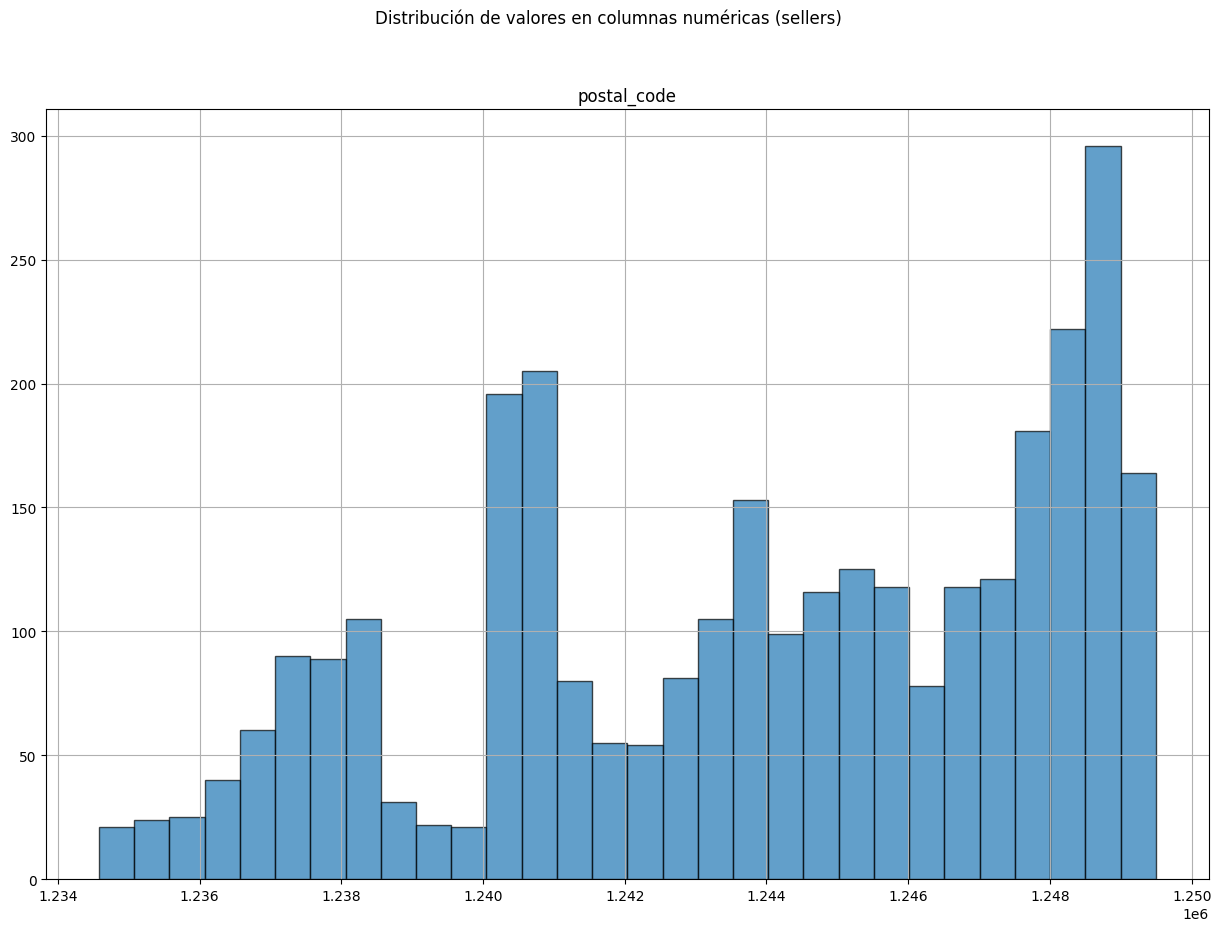

In [82]:
preprocess_and_analyze(sellers_df, 'sellers')

# **Conclucíon:**

datos estan en bien estado

In [83]:
sellers_df_cleaned = sellers_df.copy()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# CUSTOMERS



--- Análisis de datos para customers ---

Primeras filas:
                     customer_id               customer_unique_id  postal_code
1f3a804d70c2dbac1a1952f846cdc51c 8a6dcbb83a88fe73e7e5e9e999270870      1248685
64574bc447d7284fdc8cbebad3f06794 8514e469697b53032cc2f8530284d254      1247707
48ae96c741274aa51e742cde999d02b5 895f54592033f6ff9ac846a91f9b811c      1243965
79c3f9c79a9ad8bea3b475595b7fe8c3 89a38d852b53f1850739565116c07c3a      1247491
f545f780ad091c00a0e9329e189b2a90 d5bebcb004762d2abfb206a4e3cbe97a      1248212

Tipos de datos:
customer_id           object
customer_unique_id    object
postal_code            int64
dtype: object

Valores faltantes:
customer_id           0
customer_unique_id    0
postal_code           0
dtype: int64

Duplicados: 0

Nombres de columnas: ['customer_id', 'customer_unique_id', 'postal_code']

Estadísticas básicas:
                             customer_id                customer_unique_id  \
count                              99441            

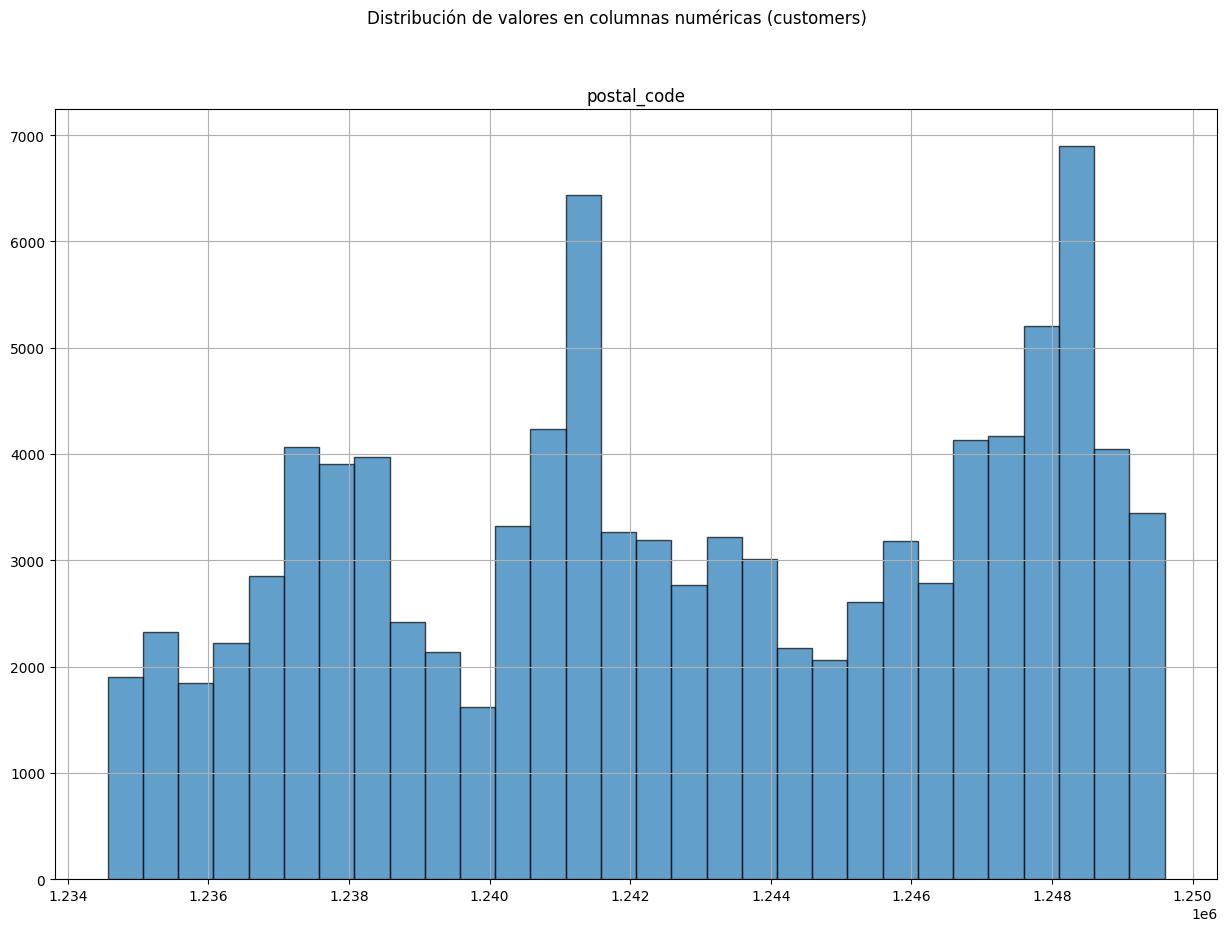

In [84]:
preprocess_and_analyze(customers_df, 'customers')

# **Conclucíon:**

datos estan en bien estado

In [85]:
customers_df_cleaned = customers_df.copy()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# GEOLOCALIZACIONES



--- Análisis de datos para geolocalizaciones ---

Primeras filas:
CLIENT_ISO_CODE             CITY ZIPCODE  LONGITUDE  LATITUDE   id_cp
             NL          Alkmaar 1821 ap     4.7604   52.6289 1234567
             ES           MADRID   28013    -3.7118   40.4190 1234568
             MX Playa del Carmen   77727   -87.0657   20.6519 1234569
             DE           Berlin   13591    13.1405   52.5345 1234570
             NL         Den Haag 2571 ht     4.2903   52.0689 1234571

Tipos de datos:
CLIENT_ISO_CODE     object
CITY                object
ZIPCODE             object
LONGITUDE          float64
LATITUDE           float64
id_cp                int64
dtype: object

Valores faltantes:
CLIENT_ISO_CODE    0
CITY               1
ZIPCODE            0
LONGITUDE          0
LATITUDE           0
id_cp              0
dtype: int64

Duplicados: 0

Nombres de columnas: ['CLIENT_ISO_CODE', 'CITY', 'ZIPCODE', 'LONGITUDE', 'LATITUDE', 'id_cp']

Estadísticas básicas:
       CLIENT_ISO_CODE    C

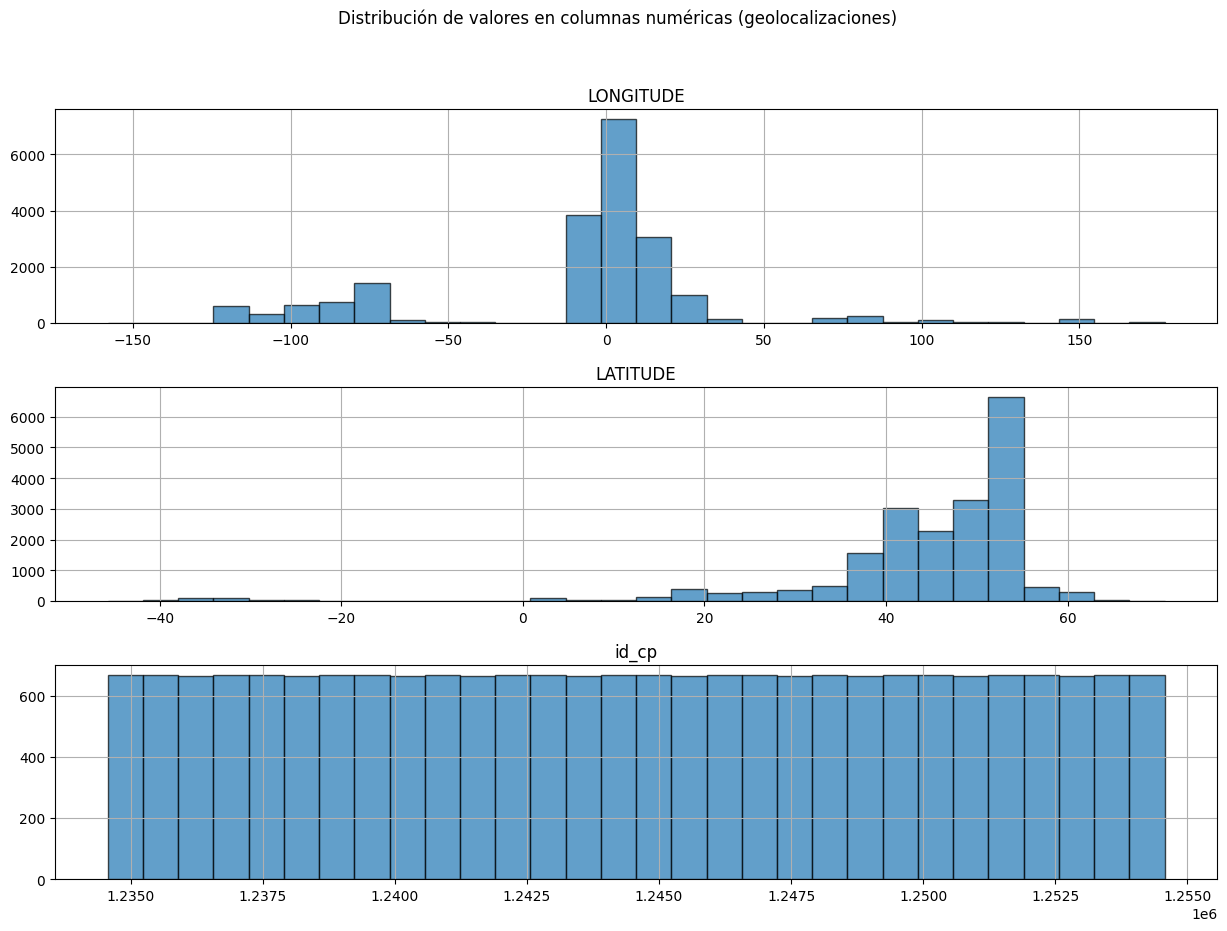

In [86]:
preprocess_and_analyze(geolocalizaciones_df, 'geolocalizaciones')

Deleting a line with a blank in the City column

In [87]:
geolocalizaciones_df_cleaned = geolocalizaciones_df.dropna(subset=['CITY'])




Give the columns the correct heading names

In [88]:
geolocalizaciones_df_cleaned.columns = geolocalizaciones_df_cleaned.columns.str.strip().str.lower()

Analys datos en la columna 'city'

In [89]:



# Paso 1: Convertir todos los nombres de ciudades al formato "Primera letra mayúscula, el resto minúsculas"
# Usamos .str.title() si los nombres pueden contener varias palabras
geolocalizaciones_df_cleaned.loc[:, 'city'] = geolocalizaciones_df_cleaned['city'].str.title()

# Paso 2: Verificar el resultado
print(geolocalizaciones_df_cleaned['city'].unique())  # Mira los valores únicos después de la corrección



['Alkmaar' 'Madrid' 'Playa Del Carmen' ... 'Bęczyn' 'Thomasville'
 'Castellar Del Valles']


Analys datos en la columna 'client_iso_code'

In [90]:





unique_codes = geolocalizaciones_df_cleaned['client_iso_code'].unique()
print("Códigos ISO únicos:")
print(unique_codes)


invalid_codes = geolocalizaciones_df_cleaned[~geolocalizaciones_df_cleaned['client_iso_code'].str.match(r'^[A-Z]{2}$', na=False)]
print("Códigos inválidos:")
print(invalid_codes)


geolocalizaciones_df_cleaned['client_iso_code'] = geolocalizaciones_df_cleaned['client_iso_code'].fillna('UNKNOWN')
geolocalizaciones_df_cleaned['client_iso_code'] = geolocalizaciones_df_cleaned['client_iso_code'].replace(invalid_codes['client_iso_code'].unique(), 'UNKNOWN')


unique_codes_after = geolocalizaciones_df_cleaned['client_iso_code'].unique()
print("Códigos ISO únicos después de la corrección:")
print(unique_codes_after)




Códigos ISO únicos:
['NL' 'ES' 'MX' 'DE' 'GB' 'IE' 'NO' 'PL' 'US' 'IN' 'BE' 'TR' 'FR' 'IT'
 'AU' 'AT' 'PT' 'SE' 'CH' 'CA' 'RS' 'SK' 'RO' 'CO' 'PH' 'MK' 'TH' 'SG'
 'AR' 'CZ' 'HR' 'SI' 'MY' 'LV' 'LT' 'DZ' 'BR' 'PR' 'HU' 'BG' 'NZ' 'ZA'
 'EE' 'FI' 'UA' 'CY' 'IS' 'GF' 'RE']
Códigos inválidos:
Empty DataFrame
Columns: [client_iso_code, city, zipcode, longitude, latitude, id_cp]
Index: []
Códigos ISO únicos después de la corrección:
['NL' 'ES' 'MX' 'DE' 'GB' 'IE' 'NO' 'PL' 'US' 'IN' 'BE' 'TR' 'FR' 'IT'
 'AU' 'AT' 'PT' 'SE' 'CH' 'CA' 'RS' 'SK' 'RO' 'CO' 'PH' 'MK' 'TH' 'SG'
 'AR' 'CZ' 'HR' 'SI' 'MY' 'LV' 'LT' 'DZ' 'BR' 'PR' 'HU' 'BG' 'NZ' 'ZA'
 'EE' 'FI' 'UA' 'CY' 'IS' 'GF' 'RE']


<ipython-input-90-67c0f6451a14>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-67c0f6451a14>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Conclucíon:**

datos tienen Nan en la columna 'city' y encabezados de columna en mayúscula, hay cambias en los nombres de ciudades.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# ORDERS



--- Análisis de datos para orders ---

Primeras filas:
                        order_id                      customer_id    status  purchase_timestamp         approved_at delivered_courier_date delivered_customer_date estimated_delivery_date
1582d3d1c7a4c1fd7b5857c7e6c084bb c1d75069901ff3b203405a36de0c653b delivered 2022-10-02 10:56:33 2022-10-02 11:07:15    2022-10-04 19:55:00     2022-10-10 21:25:13              2022-10-18
770a0411b7850b3d8f8c55cd41316eb9 d12b894fe079585668a12171ef6d3a9c delivered 2023-07-24 20:41:37 2023-07-26 03:24:27    2023-07-26 14:31:00     2023-08-07 15:27:45              2023-08-13
64cafa9458e5376e77efcce3c095e541 1df65b523d72a0bb1e1716380fb5cf81 delivered 2023-08-08 08:38:49 2023-08-08 08:55:23    2023-08-08 13:50:00     2023-08-17 18:06:29              2023-09-04
6c3c529bb633c560baf62a0713105b1a 1a732b2a6f825905c149b56f77e63e39 delivered 2022-11-18 19:28:06 2022-11-18 19:45:59    2022-11-22 13:39:59     2022-12-02 00:28:42              2022-12-15
d0fe056b

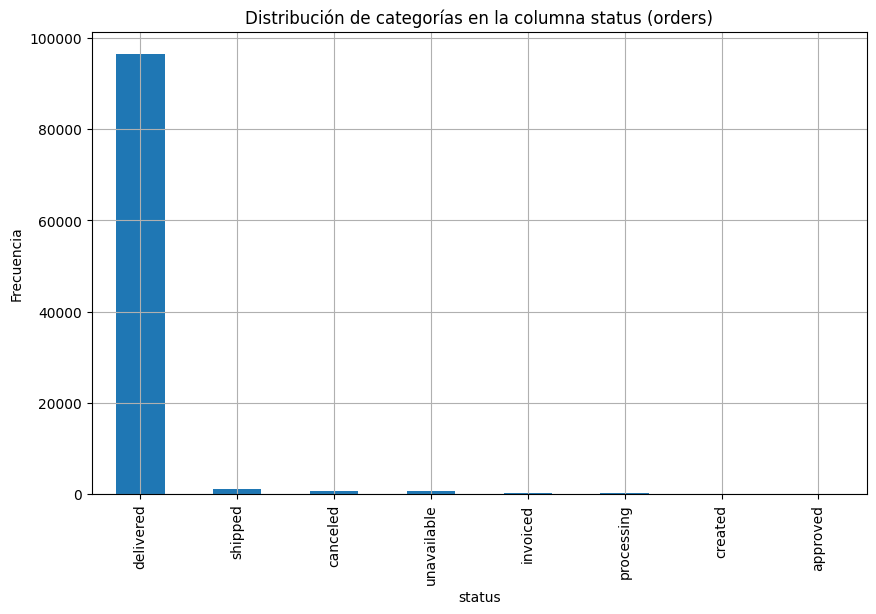

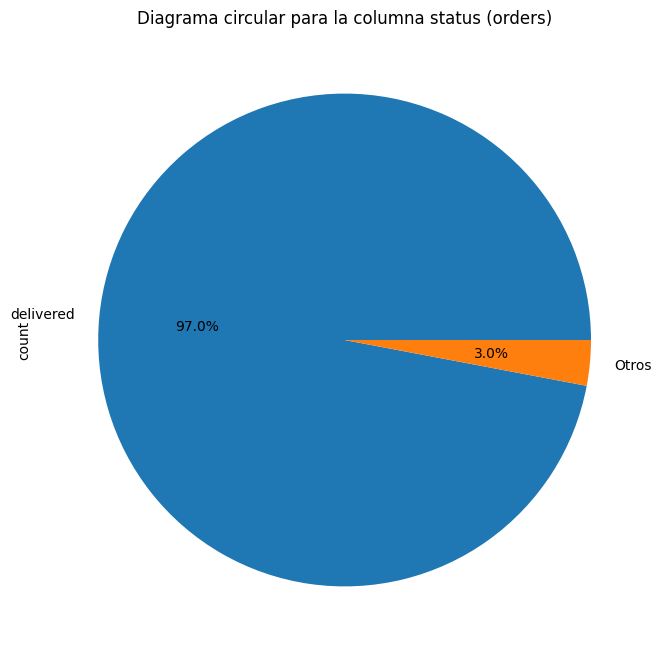

In [91]:
preprocess_and_analyze(orders_df, 'orders')

Cambiamos los typos de datos de fechas.

In [92]:



orders_df_cleaned = orders_df.copy()


orders_df_cleaned['purchase_timestamp'] = pd.to_datetime(orders_df_cleaned['purchase_timestamp'], errors='coerce')
orders_df_cleaned['approved_at'] = pd.to_datetime(orders_df_cleaned['approved_at'], errors='coerce')
orders_df_cleaned['delivered_courier_date'] = pd.to_datetime(orders_df_cleaned['delivered_courier_date'], errors='coerce')
orders_df_cleaned['delivered_customer_date'] = pd.to_datetime(orders_df_cleaned['delivered_customer_date'], errors='coerce')
orders_df_cleaned['estimated_delivery_date'] = pd.to_datetime(orders_df_cleaned['estimated_delivery_date'], errors='coerce')


incorrect_order = orders_df_cleaned['order_id'] == '35ed1360fc390669e867a143fdd9f175'
orders_df_cleaned.loc[incorrect_order, 'purchase_timestamp'] = orders_df_cleaned.loc[incorrect_order, 'purchase_timestamp'].apply(lambda x: x.replace(year=2022))

#NAN

#orders_df_cleaned['approved_at'] = orders_df_cleaned['approved_at'].fillna('1970-01-01 00:00:00')
#orders_df_cleaned['delivered_courier_date'] = orders_df_cleaned['delivered_courier_date'].fillna('1970-01-01 00:00:00')
#orders_df_cleaned['delivered_customer_date'] = orders_df_cleaned['delivered_customer_date'].fillna('1970-01-01 00:00:00')

# filtr lines con delivered_customer_date = '1970-01-01 00:00:00'
#filtered_df = orders_df_cleaned[orders_df_cleaned['delivered_customer_date'] == '1970-01-01 00:00:00']

# Анализ распределения значений в столбце status
#status_distribution = filtered_df['status'].value_counts()

#print("Distribución de valores en la columna 'status' para entregas sin fecha de entrega del cliente:")
#print(status_distribution)


Outliers

In [93]:
# Crear una nueva columna para la diferencia de días entre la fecha de entrega real y la fecha de entrega estimada
orders_df_cleaned['delivery_time_diff'] = (orders_df_cleaned['delivered_customer_date'] - orders_df_cleaned['estimated_delivery_date']).dt.days

# Gráfico interactivo para la diferencia de tiempo de entrega
fig = px.box(orders_df_cleaned, y='delivery_time_diff', points='all', title='Boxplot para la diferencia de tiempo de entrega')
fig.update_yaxes(title_text='Diferencia en días')
fig.show()


Analys datos en las columnas de fechas

In [94]:
# Análisis de las fechas
def analyze_date_columns(df):
    # Verificar las fechas mínimas y máximas para cada columna
    for column in ['purchase_timestamp', 'approved_at', 'delivered_courier_date', 'delivered_customer_date', 'estimated_delivery_date']:
        min_date = df[column].min()
        max_date = df[column].max()

        # Imprimir el resultado
        print(f"Fecha mínima en '{column}': {min_date}")
        print(f"Fecha máxima en '{column}': {max_date}")
        print('-' * 40)

        # Verificar si hay fechas que están fuera de un rango razonable
        if pd.isna(min_date) or pd.isna(max_date):
            print(f"Hay valores NaT (No Time) en la columna '{column}'.")
        else:
            # Por ejemplo, verificar fechas anteriores a 1900 o futuras
            if min_date.year <= 1900 or max_date.year > 2100:
                print(f"Advertencia: Fechas en la columna '{column}' están fuera de un rango esperado.")
            else:
                print(f"Fechas en la columna '{column}' están dentro del rango esperado.")

# Ejecutar el análisis
analyze_date_columns(orders_df_cleaned)

Fecha mínima en 'purchase_timestamp': 2021-09-04 21:15:19
Fecha máxima en 'purchase_timestamp': 2023-10-17 17:30:18
----------------------------------------
Fechas en la columna 'purchase_timestamp' están dentro del rango esperado.
Fecha mínima en 'approved_at': 2021-09-15 12:16:38
Fecha máxima en 'approved_at': 2023-09-03 17:40:06
----------------------------------------
Fechas en la columna 'approved_at' están dentro del rango esperado.
Fecha mínima en 'delivered_courier_date': 2021-10-08 10:34:01
Fecha máxima en 'delivered_courier_date': 2023-09-11 19:48:28
----------------------------------------
Fechas en la columna 'delivered_courier_date' están dentro del rango esperado.
Fecha mínima en 'delivered_customer_date': 2021-10-11 13:46:32
Fecha máxima en 'delivered_customer_date': 2023-10-17 13:22:46
----------------------------------------
Fechas en la columna 'delivered_customer_date' están dentro del rango esperado.
Fecha mínima en 'estimated_delivery_date': 1900-07-13 00:00:00
Fec

In [95]:
# Encontrar filas donde el año es 1900 en 'estimated_delivery_date'
rows_with_year_1900 = orders_df_cleaned[orders_df_cleaned['estimated_delivery_date'].dt.year == 1900]

# Mostrar las filas encontradas
print("Filas con fecha en el año 1900 en 'estimated_delivery_date':")
print(rows_with_year_1900)

Filas con fecha en el año 1900 en 'estimated_delivery_date':
                               order_id                       customer_id  \
32471  e194657c5dc2df1bed75066d3b604d34  3a07314a16ec991c39ddf2df65003a42   

          status  purchase_timestamp         approved_at  \
32471  delivered 2023-06-24 18:47:55 2023-06-24 18:56:01   

      delivered_courier_date delivered_customer_date estimated_delivery_date  \
32471    2023-06-27 10:46:00     2023-06-28 15:51:04              1900-07-13   

       delivery_time_diff  
32471             44910.0  


In [96]:
order_id_to_remove = 'e194657c5dc2df1bed75066d3b604d34'

# Eliminar la fila correspondiente al order_id
orders_df_cleaned = orders_df_cleaned[orders_df_cleaned['order_id'] != order_id_to_remove]


# **Conclucíon:**

datos tienen Nan en las columnas 'approved_at', 'delivered_courier_date', 'delivered_customer_date', pero esto es normal.

Hay error con order id = 'e194657c5dc2df1bed75066d3b604d34'- eliminamos y con 'order_id' = '35ed1360fc390669e867a143fdd9f175' sistituir el año en la columna purchase_timestamp

Manejar el valor atípico en la diferencia de tiempo de entrega en orders_df.(44 910 y que menos 0(-73042))

Trabajamos con errores en las columnas de fechas.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# ORDER_PAYMENTS



--- Análisis de datos para order_payments ---

Primeras filas:
                        order_id  sequential payment_type  installments  amount
fe2572b623f714fd1ce4a440742b42bd           1         Visa             8   99.33
9059a827bfaca55aa71cd1cbc94fab91           1         Visa             1   24.39
988adec4d20b2d6bfcc34374f6c2a81e           1         Visa             1   65.71
55da7efcdbd4bd476ba2556f5e7d11ce           1         Visa             8  107.78
a3924e81f2aa86016f3a3e3e3e440ea8           1         Visa             2  128.45

Tipos de datos:
order_id         object
sequential        int64
payment_type     object
installments      int64
amount          float64
dtype: object

Valores faltantes:
order_id        0
sequential      0
payment_type    0
installments    0
amount          0
dtype: int64

Duplicados: 0

Nombres de columnas: ['order_id', 'sequential', 'payment_type', 'installments', 'amount']

Estadísticas básicas:
                                order_id     sequent

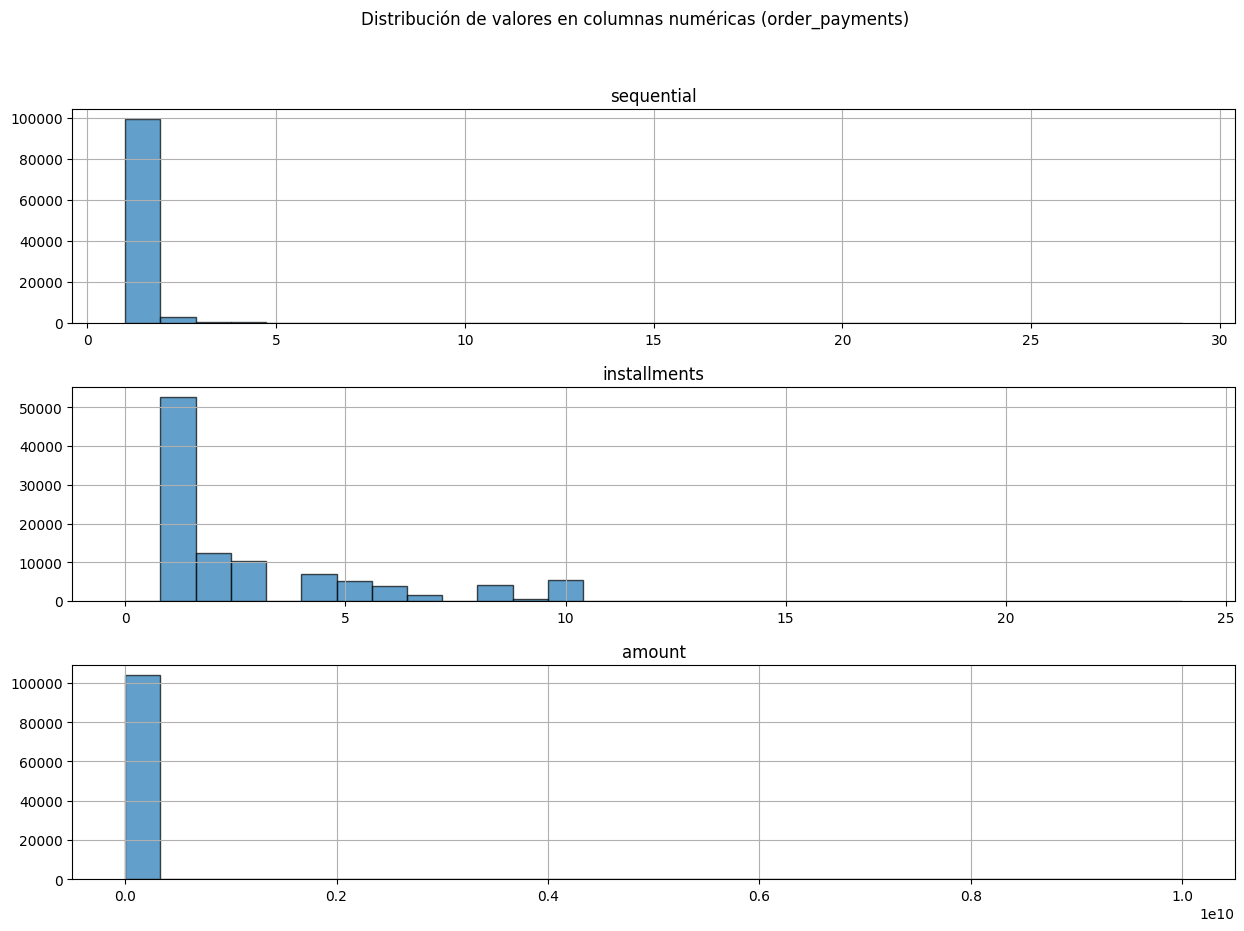

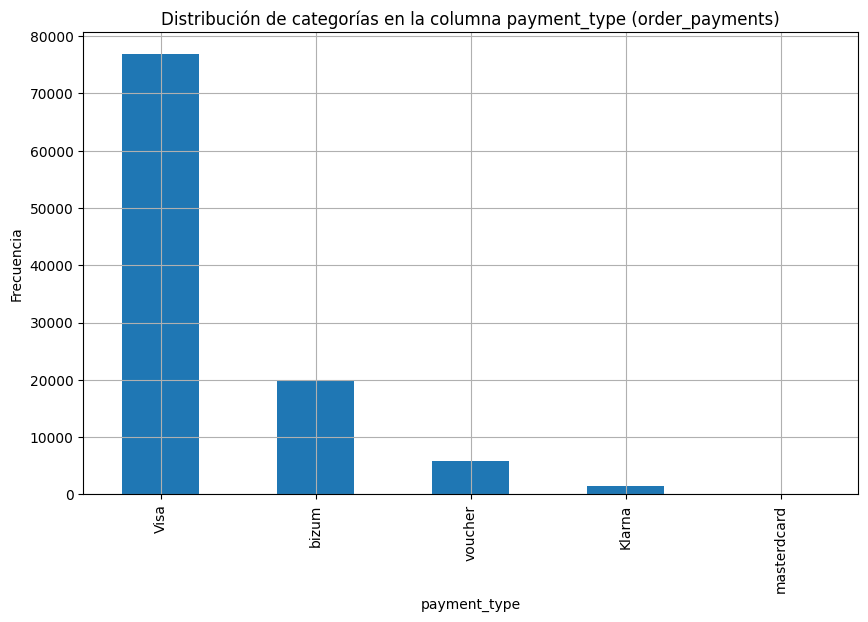

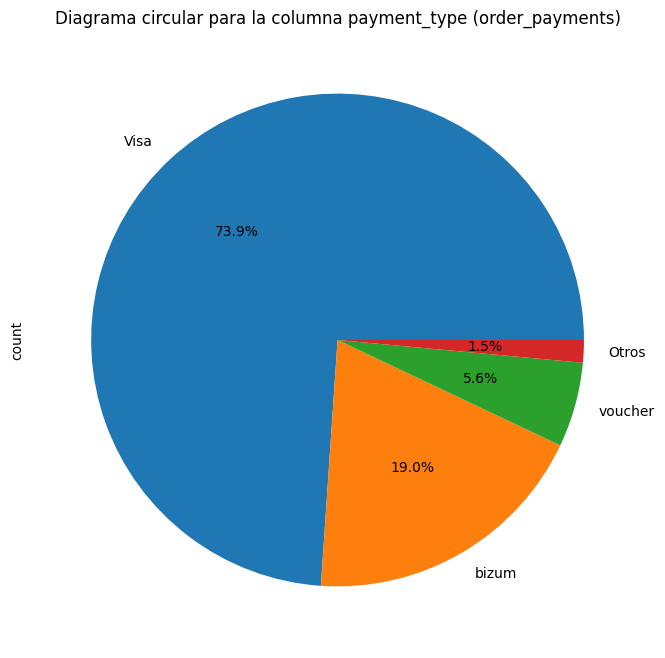

In [97]:
preprocess_and_analyze(order_payments_df, 'order_payments')

In [98]:
# Gráficos boxplot para las columnas de order_payments_df
fig = go.Figure()



# Amount
fig.add_trace(go.Box(y=order_payments_df['amount'], name='Amount', boxpoints='all', jitter=0.3, pointpos=-1.8))

# Configuración del layout
fig.update_layout(title='Boxplot para las características de pagos',
                  yaxis_title='Valor',
                  xaxis_title='Características de pagos',
                  showlegend=False)

# Mostrar gráfico interactivo
fig.show()

# **Conclucíon:**

Hay outliers la columna Amount

Eliminar el valor atípico en la columna amount de order_payments_df. ( 10B y que menos 0(-2))

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Trabajamos con outliers en dataframes: products_df, order_payments_df, orders_df

In [99]:
# 1. Eliminar el valor atípico en 'weight_g'
# Verificar el valor atípico
print(products_df['weight_g'].describe())
# Eliminar registros con 'weight_g' mayor a un umbral razonable
products_df = products_df[products_df['weight_g'] < 40000]

# 2. Eliminar el valor atípico en 'amount' de order_payments_df
# Verificar el valor atípico
print(order_payments_df['amount'].describe())
# Eliminar registros con 'amount' mayor a un umbral razonable
order_payments_df = order_payments_df[order_payments_df['amount'] < 10000]
order_payments_df = order_payments_df[order_payments_df['amount'] >= 0]
# 3. Eliminar o manejar el valor atípico en la diferencia de tiempo de entrega
# Convertir columnas de fechas a formato datetime
orders_df['purchase_timestamp'] = pd.to_datetime(orders_df['purchase_timestamp'], errors='coerce')
orders_df['delivered_customer_date'] = pd.to_datetime(orders_df['delivered_customer_date'], errors='coerce')

# Calcular la diferencia en días entre 'purchase_timestamp' y 'delivered_customer_date'
orders_df['delivery_days'] = (orders_df['delivered_customer_date'] - orders_df['purchase_timestamp']).dt.days

# Verificar el valor atípico
print(orders_df['delivery_days'].describe())
# Eliminar registros con 'delivery_days' mayor a un umbral razonable (por ejemplo, 100 días)
orders_df = orders_df[orders_df['delivery_days'] < 100]
orders_df = orders_df[orders_df['delivery_days'] >= 0]

count    3.294900e+04
mean     2.488901e+03
std      3.878808e+04
min      0.000000e+00
25%      3.000000e+02
50%      7.000000e+02
75%      1.900000e+03
max      7.000000e+06
Name: weight_g, dtype: float64
count    1.038860e+05
mean     9.641346e+04
std      3.102569e+07
min     -2.000000e+00
25%      5.679250e+01
50%      1.000000e+02
75%      1.718000e+02
max      1.000000e+10
Name: amount, dtype: float64
count    96476.000000
mean        11.336923
std        235.392573
min     -73042.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64


Box plot despues de eliminar outliers muy agresivos

In [100]:


# Crear boxplot para el peso de los productos (sin valores atípicos)
create_boxplot(products_df, 'weight_g', 'Peso (g)')

# Crear boxplot para la longitud de los productos
create_boxplot(products_df, 'length_cm', 'Longitud (cm)')

# Crear boxplot para la altura de los productos
create_boxplot(products_df, 'height_cm', 'Altura (cm)')

# Crear boxplot para la anchura de los productos
create_boxplot(products_df, 'width_cm', 'Anchura (cm)')

# Crear boxplot para el valor de pago (sin valores atípicos)
create_boxplot(order_payments_df, 'amount', 'Monto de Pago')

# Crear boxplot para la diferencia de tiempo de entrega (sin valores atípicos)
create_boxplot(orders_df, 'delivery_days', 'Días de Entrega')


## **Conclusion sobre outliers**

Rango Intercuartílico (IQR): Valores que se encuentran fuera de 1.5 veces el IQR por encima del tercer cuartil o por debajo del primer cuartil.

Q1 y Q3: Estos son los percentiles 25 y 75 de la columna, respectivamente. Representan los límites de la mayoría de los datos.
IQR: Es el rango intercuartílico, que mide la dispersión de la mitad central de los datos.
Límites Inferior y Superior: Se calculan restando o sumando 1.5 veces el IQR a Q1 y Q3. Estos límites se usan para determinar qué valores se consideran outliers.

Eliminar datos usando Q1 y Q3 es un enfoque estándar, pero puede ser considerado agresivo en ciertos contextos. A veces, usar el percentil 95 (o el percentil 99 en algunos casos) es más adecuado, especialmente si se espera que haya valores altos que sean válidos y no errores de datos.

Muy importante calcular la cantidad de datos eliminados y su proporción en comparación con el total inicial.

 Si ves que se eliminan más del 5-10% de los datos, podría ser un signo de que los límites son demasiado estrictos.



 ### **Métodos para reemplazar los valores atípicos:**

  Imputación: En lugar de eliminar los valores atípicos, puede reemplazarlos con valores medianos o valores cercanos a la mediana. Esto ayuda a conservar más datos.
  
  Capping (Recorte): Establezca límites superior e inferior y reemplace los valores que estén fuera de estos límites con el valor mínimo o máximo correspondiente.

Eliminar outliers usando el percentil 99, podemos ver que no perdemos muchos porcentaje, solo 8%, que esto es suave, es que usamos el percentil 95 o menos, en esta situacion perdemos muchos datos. Pienso que esto es util para ti. Como conclusion: grafic box plot para ver outliers grandes y donde esta min and max, Q1, Q3 y bigotes y despues tu puedes usar diferentes metodos para eliminar.

In [103]:


# Función para identificar y eliminar outliers usando el percentil 99
def remove_outliers_and_count(data, columns):
    initial_count = data.shape[0]
    cleaned_data = data.copy()  # Crear una copia del DataFrame original
    for column in columns:
        lower_bound = cleaned_data[column].quantile(0.01)
        upper_bound = cleaned_data[column].quantile(0.99)
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    final_count = cleaned_data.shape[0]
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Eliminamos %: {removed_count} ({removed_percentage:.2f}%) para la columna {column}")
    return cleaned_data

# Función para crear boxplots interactivos
def create_boxplot(data, column, nombre):
    fig = go.Figure()
    fig.add_trace(go.Box(y=data[column], name=nombre, boxpoints='all', jitter=0.3, pointpos=-1.8))
    fig.update_layout(title=f'Boxplot para {nombre}', yaxis_title=column, showlegend=False)
    fig.show()

# Aplicar la función de eliminación de outliers y guardar los datos limpios
products_df_cleaned = remove_outliers_and_count(products_df, ['weight_g', 'length_cm', 'height_cm', 'width_cm'])
order_payments_df_cleaned = remove_outliers_and_count(order_payments_df, ['amount'])
order_items_df_cleaned = remove_outliers_and_count(order_items_df_cleaned, ['price', 'freight_value'])


# Crear gráficos con datos sin outliers
create_boxplot(products_df_cleaned, 'weight_g', 'Peso (g)')
create_boxplot(products_df_cleaned, 'length_cm', 'Longitud (cm)')
create_boxplot(products_df_cleaned, 'height_cm', 'Altura (cm)')
create_boxplot(products_df_cleaned, 'width_cm', 'Anchura (cm)')
create_boxplot(order_payments_df_cleaned, 'amount', 'Monto de Pago')



Eliminamos %: 1688 (5.12%) para la columna width_cm
Eliminamos %: 2074 (2.00%) para la columna amount
Eliminamos %: 3687 (3.41%) para la columna freight_value


# Downloading processed dataframes to csv







In [104]:

order_items_df_cleaned.to_csv('order_items_cleaned.csv', index=False)
products_df_cleaned.to_csv('products_cleaned.csv', index=False)
reviews_df_cleaned.to_csv('reviews_cleaned.csv', index=False)
sellers_df_cleaned.to_csv('sellers_df_cleaned.csv', index=False)
customers_df_cleaned.to_csv('customers_df_cleaned.csv', index=False)
geolocalizaciones_df_cleaned.to_csv('geolocalizaciones_cleaned.csv', index=False)
orders_df_cleaned.to_csv('orders_cleaned.csv', index=False)
order_payments_df_cleaned.to_csv('order_payments_df_cleaned.csv', index=False)








